In [44]:
import pandas as pd 
import sqlite3    
con = sqlite3.connect('chinook.db') 
cursor = con.cursor()            
sql = "SELECT trackid,tracks.name,albums.Title AS album,media_types.Name AS media,genres.Name AS genres FROM tracks INNER JOIN albums ON Albums.AlbumId = tracks.AlbumId INNER JOIN media_types ON media_types.MediaTypeId = tracks.MediaTypeId INNER JOIN genres ON genres.GenreId = tracks.GenreId;"  

try:
    cursor.execute(sql)
    con.commit()
    print("Entry successfully retrieved.")
except Exception as e:
    print("Exception occurred.",e)

result = cursor.fetchall()

df = pd.DataFrame(result, columns=[ 
'Track ID','Track Name','Album Titles','Media Type','Genres'
  ])
df
df.to_sql('asm', con, if_exists='replace', index = False) 

con.close()

Entry successfully retrieved.


<img src = "ASMERD.jpg"/>

In [42]:
con = sqlite3.connect('chinook.db')
cursor = con.cursor()            
sql = "SELECT genres, COUNT (*) as count From asm GROUP BY genres ORDER BY count DESC"  

try:
    cursor.execute(sql)
    con.commit()
    print("Entry successfully retrieved.")

except Exception as e:
    print("Exception occurred.",e)

result = cursor.fetchall()

con.close()
df = pd.DataFrame(result, columns=[ 
'Genres','Count'
  ])
df


Entry successfully retrieved.


,Genres,Count
0,Rock,1297
1,Latin,579
2,Metal,374
3,Alternative & Punk,332
4,Jazz,130
5,TV Shows,93
6,Blues,81
7,Classical,74
8,Drama,64
9,R&B/Soul,61


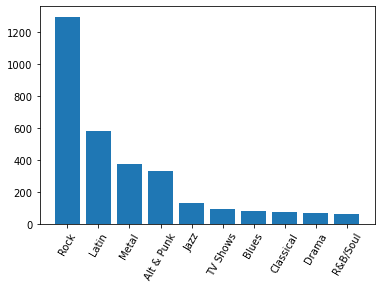

In [40]:
from matplotlib import pyplot as plt
genre = df["Genres"][0:10]
genre =[item.replace('Alternative & Punk','Alt & Punk')for item in genre]
ct = df["Count"][0:10] 
ax = plt.subplot()
plt.bar(range(len(genre)),ct)  
ax.set_xticks(range(len(genre)))  
ax.set_xticklabels(genre,rotation=60)  
plt.show()